### Machine Learning Project 1: Predict Student Performance

This project involves analyzing student performance data to predict outcomes based on various features.
Two subjects are considered: Mathematics and Portuguese language.

Machine Learning Model used: Decision Tree Regressor

Step 1: Import necessary libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

Step 2: Read the dataset

In [6]:
math_df = pd.read_csv('student/student-mat.csv', sep=';')
por_df = pd.read_csv('student/student-por.csv', sep=';')

Step 3: Print the first 5 data of both datasets

In [7]:
print("Mathematics Data:\n", math_df.head(5))
print("Portugese Language Data:\n", por_df.head(5))

Mathematics Data:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Portugese Language Data:
   school sex  age address famsize Pstatus  

Encode categorical variables using one-hot encoding. Replace True/False with 1/0 for binary columns

In [8]:
math_df_encoded = pd.get_dummies(math_df, drop_first=True).astype(int)
por_df_encoded = pd.get_dummies(por_df, drop_first=True).astype(int)
print("Encoded Mathematics Data:\n", math_df_encoded.head(5))
print("Encoded Portugese Language Data:\n", por_df_encoded.head(5))

Encoded Mathematics Data:
    age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...                1               0              1           0   
1     1  ...                0               0              0           1   
2     2  ...                1               0              1           0   
3     1  ...                1               0              0           1   
4     1  ...                0               0              0           1   

   paid_yes  activities_yes  nurser

Split the data into training and testing sets (80% train, 20% test)

In [9]:
math_train, math_test = train_test_split(math_df_encoded, test_size=0.2, random_state=42)
por_train, por_test = train_test_split(por_df_encoded, test_size=0.2, random_state=42)

Save them as CSV Files

In [10]:
math_train.to_csv('math_train.csv', index=False)
math_test.to_csv('math_test.csv', index=False)
por_train.to_csv('por_train.csv', index=False)
por_test.to_csv('por_test.csv', index=False)

For both datasets: The features are all columns excpet G1, G2, and G3; The target for prediction is 'G3'

In [11]:
math_features = math_df_encoded.columns.drop(['G1', 'G2', 'G3'])
X_math_train = math_train[math_features]
y_math_train = math_train['G3']
X_math_test = math_test[math_features]
y_math_test = math_test['G3']

por_features = por_df_encoded.columns.drop(['G1', 'G2', 'G3'])
X_por_train = por_train[por_features]
y_por_train = por_train['G3']
X_por_test = por_test[por_features]
y_por_test = por_test['G3']

Train the Mathematics model with Decision Tree Regression.

In [12]:
math_model = DecisionTreeRegressor(random_state=42)
math_model.fit(X_math_train, y_math_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Train the Portuguese model with Decision Tree Regression.

In [13]:
por_model = DecisionTreeRegressor(random_state=42)
por_model.fit(X_por_train, y_por_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Testing, and Metrics calculation for mathematics dataset.

In [14]:
math_y_pred = math_model.predict(X_math_test)
math_mse = mean_squared_error(y_math_test, math_y_pred)
math_r2 = r2_score(y_math_test, math_y_pred)
print("Mathematics Model Performance:")
print(f"Mean Squared Error: {math_mse}")
print(f"R^2 Score: {math_r2}")

Mathematics Model Performance:
Mean Squared Error: 23.835443037974684
R^2 Score: -0.16241834151220558


Testing, and Metrics calculation for Portugese language dataset.

In [15]:
por_y_pred = por_model.predict(X_por_test)
por_mse = mean_squared_error(y_por_test, por_y_pred)
por_r2 = r2_score(y_por_test, por_y_pred)
print("Portuguese Model Performance:")
print(f"Mean Squared Error: {por_mse}")
print(f"R^2 Score: {por_r2}")

Portuguese Model Performance:
Mean Squared Error: 13.5
R^2 Score: -0.38437173855003537


Use a sample from the test set for demonstration. Predict and compare with the actual result.

In [16]:
math_sample = X_math_test.iloc[0]
print("Mathematics Sample data for testing: \n", math_sample.tolist())
predicted_math_g3 = math_model.predict([math_sample])
print(f"Predicted G3 (Mathematics): {predicted_math_g3[0]}")
print(f"Actual G3 (Mathematics): {y_math_test.iloc[0]}")

Mathematics Sample data for testing: 
 [17, 2, 1, 2, 1, 3, 4, 5, 1, 1, 1, 3, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]
Predicted G3 (Mathematics): 9.0
Actual G3 (Mathematics): 10


/Users/macbook/Documents/Code Python/ML_Projects/Project1/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [17]:
por_sample = X_por_test.iloc[0] 
print("Portuguese Sample data for testing: \n", por_sample.tolist())
predicted_por_g3 = por_model.predict([por_sample])
print(f"Predicted G3 (Portuguese): {predicted_por_g3[0]}")
print(f"Actual G3 (Portuguese): {y_por_test.iloc[0]}")

Portuguese Sample data for testing: 
 [18, 4, 4, 1, 2, 0, 3, 2, 4, 1, 4, 2, 4, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]
Predicted G3 (Portuguese): 15.0
Actual G3 (Portuguese): 19


/Users/macbook/Documents/Code Python/ML_Projects/Project1/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Draw a plot to see the G3 score of both subjects for every student

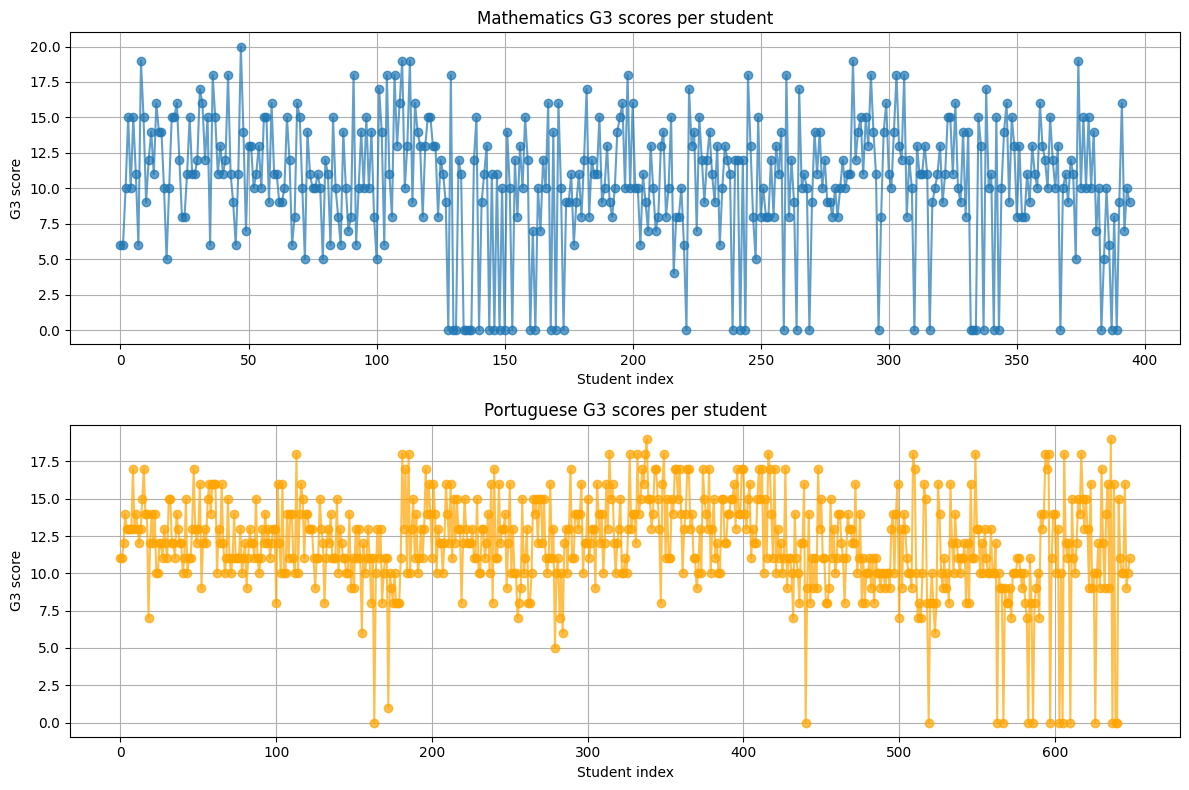

In [18]:
import matplotlib.pyplot as plt

# Ensure indices are consecutive for plotting
math_g3 = math_df['G3'].reset_index(drop=True)
por_g3  = por_df['G3'].reset_index(drop=True)

plt.figure(figsize=(12,8))

# Top: Mathematics G3 per student
plt.subplot(2,1,1)
plt.plot(math_g3, marker='o', linestyle='-', alpha=0.7)
plt.title('Mathematics G3 scores per student')
plt.xlabel('Student index')
plt.ylabel('G3 score')
plt.grid(True)

# Bottom: Portuguese G3 per student
plt.subplot(2,1,2)
plt.plot(por_g3, marker='o', linestyle='-', color='orange', alpha=0.7)
plt.title('Portuguese G3 scores per student')
plt.xlabel('Student index')
plt.ylabel('G3 score')
plt.grid(True)

plt.tight_layout()
plt.show()

Prediction vs Actual Plot

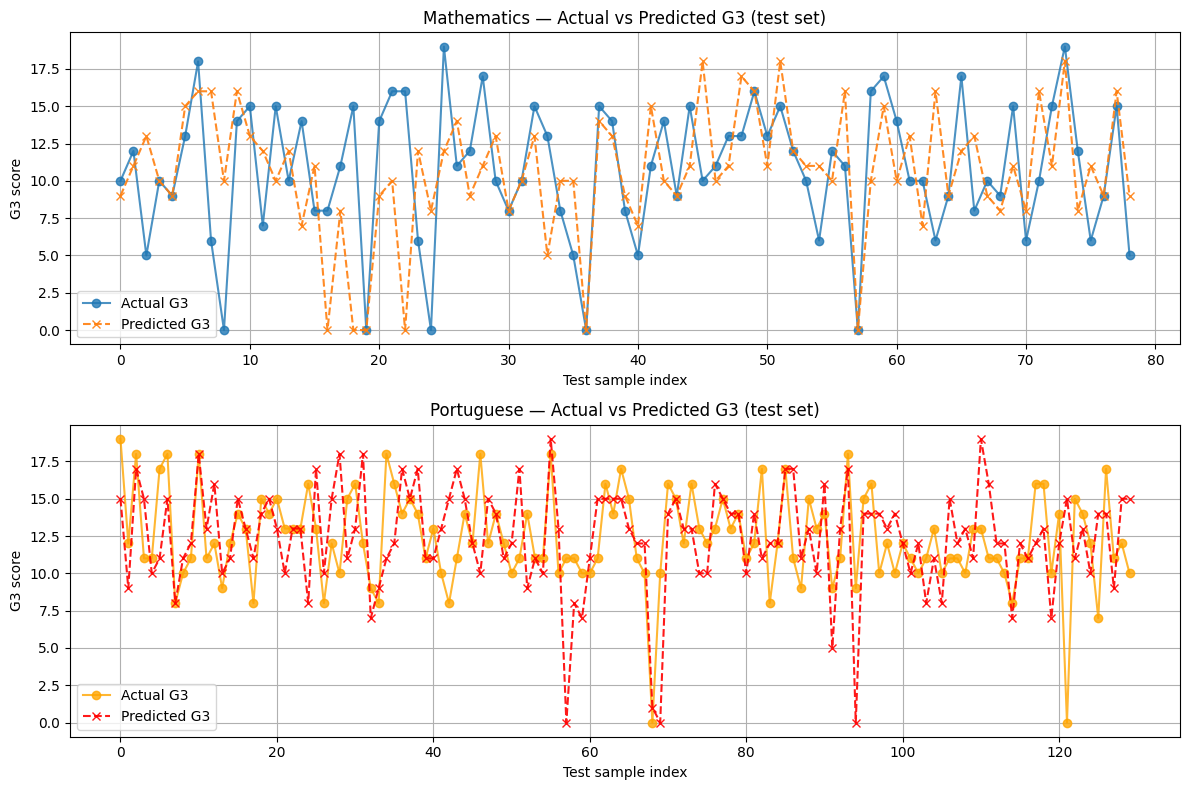

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Align indices between actual and predicted
math_actual = y_math_test.reset_index(drop=True)
math_pred = pd.Series(math_y_pred).reset_index(drop=True)

por_actual = y_por_test.reset_index(drop=True)
por_pred = pd.Series(por_y_pred).reset_index(drop=True)

plt.figure(figsize=(12,8))

# Mathematics: Actual vs Predicted over test samples
plt.subplot(2,1,1)
plt.plot(math_actual, marker='o', linestyle='-', label='Actual G3', alpha=0.8)
plt.plot(math_pred, marker='x', linestyle='--', label='Predicted G3', alpha=0.9)
plt.title('Mathematics — Actual vs Predicted G3 (test set)')
plt.xlabel('Test sample index')
plt.ylabel('G3 score')
plt.legend()
plt.grid(True)

# Portuguese: Actual vs Predicted over test samples
plt.subplot(2,1,2)
plt.plot(por_actual, marker='o', linestyle='-', color='orange', label='Actual G3', alpha=0.8)
plt.plot(por_pred, marker='x', linestyle='--', color='red', label='Predicted G3', alpha=0.9)
plt.title('Portuguese — Actual vs Predicted G3 (test set)')
plt.xlabel('Test sample index')
plt.ylabel('G3 score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Optional: Train a second model with G1 and G2.